In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd


In [3]:
path = '/Users/srinidhienaidu/Downloads/LAB #1- GIANNA KINSEY AND SRINIDHIS DAY OF FUN.mat'
roach_dict = scipy.io.loadmat(path)

In [4]:
print(roach_dict.keys())

dict_keys(['data', 'datastart', 'dataend', 'titles', 'rangemin', 'rangemax', 'unittext', 'unittextmap', 'blocktimes', 'tickrate', 'samplerate', 'firstsampleoffset', 'comtext', 'com'])


In [5]:
print(roach_dict['titles'])

['Channel 1' 'Channel 2' 'Channel 3']


In [6]:
print(roach_dict['data'].shape)

(1, 29214000)


In [7]:
start_times = roach_dict['datastart'][0]
end_times = roach_dict['dataend'][0]
all_data = roach_dict['data'].flatten()

chunks = zip(start_times, end_times)
list_of_tuples = list(chunks)
start_stops = np.array(list_of_tuples)

NUM_SESSION = start_times.shape[0]

In [50]:
data_chunked = {}

for session in range(NUM_SESSION):
    counter = 0
    if session == 0:
        name = 'spont_firing'
    if 1 <= session <= 6:
        name = f'pos_1_{session}'
        counter += 1
    if 6 < session <= 12:
        # val = session - 6
        name = f'pos_2_{session - 6}'
    if 13 <= session <= NUM_SESSION:
        name = f'pos_3_{session - 12}'

    start = int(start_stops[session][0])
    end = int(start_stops[session][1])
    data_chunked[name] = all_data[start:end]

In [53]:
data_chunked.keys()

position = 1
trial = 1 # 1-3 for amp, 4-6 for vel

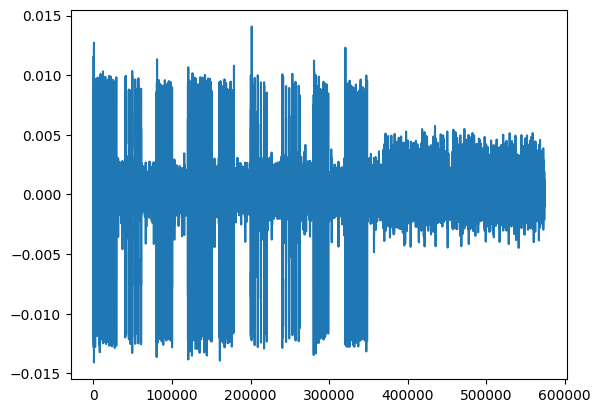